In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data = data.sample(n=1000, random_state=42)
sampled_indices = np.array(data.index)
sampled_indices

array([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,
        5723, 20069,  6835, 11351, 20267,  7097,  6298,   696, 19607,
       14173, 19638, 18332,  4691,  2323, 16880, 14521, 19833,  8383,
        2647,  1456,  5678,   341,  4852, 14386, 18261, 16105,  9149,
       16879,  6253, 11741,  7330, 20460,  2412, 19391, 11441, 13332,
        3721, 14986, 14152,  5654,  2578, 19332,  3376, 15118,  9620,
        7191, 19932, 13706,  6220, 14641, 12101, 11512,  4743, 19402,
        2608, 11449,  7654, 19060,  1350,  4591,  7168,  3354,   738,
        2351, 15137,  8530, 19150, 17041, 10495,  7806,  8915, 19890,
       10216,  4391,  4600,  5751, 15479,  3328, 12809, 20268,  3958,
       18873, 17928, 14307,  2028, 13069,  6052, 15975, 14331,  1606,
       10915, 13336, 10389, 14462, 14930,  6962, 10236,  4279,  4738,
       17973, 19559,   538,  4186,  2826, 17840, 12570,  4767,  7763,
        4043, 11311,  6068, 19252,  8337, 16025,  4309, 15060,  2420,
       13656,  5665,

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.00,1505.00,NaN,1392.00,359.00,1.68,47700.00,INLAND
3024,-119.46,35.14,30.00,2943.00,NaN,1565.00,584.00,2.53,45800.00,INLAND
15663,-122.44,37.80,52.00,3830.00,NaN,1310.00,963.00,3.48,500001.00,NEAR BAY
20484,-118.72,34.28,17.00,3051.00,NaN,1705.00,495.00,5.74,218600.00,<1H OCEAN
9814,-121.93,36.62,34.00,2351.00,NaN,1063.00,428.00,3.73,278000.00,NEAR OCEAN
13311,-117.61,34.08,12.00,4427.00,NaN,2400.00,843.00,4.71,158700.00,INLAND
7113,-118.02,33.89,36.00,1375.00,NaN,670.00,221.00,5.08,198200.00,<1H OCEAN
7668,-118.08,33.92,38.00,1335.00,NaN,1011.00,269.00,3.69,157500.00,<1H OCEAN
18246,-122.08,37.39,4.00,2292.00,NaN,1050.00,584.00,4.80,340000.00,NEAR BAY
5723,-118.23,34.18,45.00,2332.00,NaN,943.00,339.00,8.11,446600.00,<1H OCEAN


In [5]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column longitude has values in range -124.15 to -114.59


Column latitude has values in range 32.55 to 41.79


Column housing_median_age has values in range 2.0 to 52.0


Column total_rooms has values in range 18.0 to 21897.0


Column total_bedrooms has values in range 3.0 to 3513.0


Column population has values in range 8.0 to 8652.0


Column households has values in range 5.0 to 3589.0


Column median_income has values in range 0.6831 to 15.0001


Column median_house_value has values in range 30000.0 to 500001.0


Column ocean_proximity has 4 number of unique values
['INLAND' 'NEAR BAY' '<1H OCEAN' 'NEAR OCEAN']




In [6]:
for column in data.columns:
    print(column, data[column].isnull().sum())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.cov()
#Cov(X, Y) = Σ[(x_i - μ_x) * (y_i - μ_y)] / (n - 1)
#2 random variables mdhla relation sathi use hoto, hyachi positive value mhanje 1 vadhla ki dusra pn vadhnar 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,3.87,-3.83,-3.06,115.14,62.06,214.61,28.74,0.01,-14511.76
latitude,-3.83,4.47,0.86,-91.65,-55.48,-240.85,-45.73,-0.43,-33626.07
housing_median_age,-3.06,0.86,151.03,-9967.37,-1735.73,-4241.20,-1469.57,-2.47,142875.43
total_rooms,115.14,-91.65,-9967.37,4440125.00,824499.39,1890101.14,695895.52,767.19,33218847.56
total_bedrooms,62.06,-55.48,-1735.73,824499.39,160361.72,367186.95,139342.11,-10.77,1438821.08
population,214.61,-240.85,-4241.20,1890101.14,367186.95,1067722.87,344441.94,-6.81,-3864368.61
households,28.74,-45.73,-1469.57,695895.52,139342.11,344441.94,130884.30,0.07,3029180.74
median_income,0.01,-0.43,-2.47,767.19,-10.77,-6.81,0.07,4.09,162111.85
median_house_value,-14511.76,-33626.07,142875.43,33218847.56,1438821.08,-3864368.61,3029180.74,162111.85,13556249936.26


In [8]:
mean1 = data['total_bedrooms'].mean()
data['total_bedrooms'] = data['total_bedrooms'].fillna(mean1)

In [9]:
data.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,3.87,-3.83,-3.06,115.14,49.20,214.61,28.74,0.01,-14511.76
latitude,-3.83,4.47,0.86,-91.65,-43.98,-240.85,-45.73,-0.43,-33626.07
housing_median_age,-3.06,0.86,151.03,-9967.37,-1376.07,-4241.20,-1469.57,-2.47,142875.43
total_rooms,115.14,-91.65,-9967.37,4440125.00,653657.18,1890101.14,695895.52,767.19,33218847.56
total_bedrooms,49.20,-43.98,-1376.07,653657.18,127133.61,291103.17,110469.42,-8.54,1140686.98
population,214.61,-240.85,-4241.20,1890101.14,291103.17,1067722.87,344441.94,-6.81,-3864368.61
households,28.74,-45.73,-1469.57,695895.52,110469.42,344441.94,130884.30,0.07,3029180.74
median_income,0.01,-0.43,-2.47,767.19,-8.54,-6.81,0.07,4.09,162111.85
median_house_value,-14511.76,-33626.07,142875.43,33218847.56,1140686.98,-3864368.61,3029180.74,162111.85,13556249936.26


In [10]:
for column in data.columns:
    print(column, data[column].isnull().sum())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [11]:
datafinal = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['ocean_proximity'])
datafinal.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25.00,1505.00,530.95,1392.00,359.00,1.68,47700.00,0,1,0,0
3024,-119.46,35.14,30.00,2943.00,530.95,1565.00,584.00,2.53,45800.00,0,1,0,0
15663,-122.44,37.80,52.00,3830.00,530.95,1310.00,963.00,3.48,500001.00,0,0,1,0
20484,-118.72,34.28,17.00,3051.00,530.95,1705.00,495.00,5.74,218600.00,1,0,0,0
9814,-121.93,36.62,34.00,2351.00,530.95,1063.00,428.00,3.73,278000.00,0,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datafinal2 = scaler.fit_transform(datafinal)
np.set_printoptions(suppress=True, precision=2)
datafinal2

array([[ 0.23,  0.25, -0.32, ...,  1.52, -0.34, -0.41],
       [ 0.01, -0.18,  0.09, ...,  1.52, -0.34, -0.41],
       [-1.51,  1.08,  1.88, ..., -0.66,  2.97, -0.41],
       ...,
       [ 0.67, -0.71,  0.41, ..., -0.66, -0.34, -0.41],
       [ 0.5 , -0.66, -0.08, ..., -0.66, -0.34, -0.41],
       [-1.31,  0.75,  0.09, ..., -0.66, -0.34,  2.43]])

In [13]:
import numpy as np

def calculate_distance_matrix(data):
    num_rows = data.shape[0]
    distances = np.zeros((num_rows, num_rows))

    for i in range(num_rows):
        for j in range(num_rows):
            distances[i, j] = np.linalg.norm(data[i] - data[j])

    return distances

def dbscan(distance_matrix, epsilon, min_samples):
    num_samples = distance_matrix.shape[0]
    labels = np.full(num_samples, -1)  

    cluster_id = 0

    for i in range(num_samples):
        if labels[i] != -1:  
            continue

        neighbors = [j for j in range(num_samples) if distance_matrix[i, j] <= epsilon]

        if len(neighbors) < min_samples:
            labels[i] = -1  
        else:
            cluster_id += 1
            expand_cluster(distance_matrix, labels, i, neighbors, cluster_id, epsilon, min_samples)

    return labels

def expand_cluster(distance_matrix, labels, point_idx, neighbors, cluster_id, epsilon, min_samples):
    labels[point_idx] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1:  
            labels[neighbor_idx] = cluster_id
            new_neighbors = [j for j in range(len(distance_matrix)) if distance_matrix[neighbor_idx, j] <= epsilon]
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        i += 1


In [14]:
epsilon = 0.5
min_samples = 5 
distance_matrix = calculate_distance_matrix(datafinal2)  

cluster_labels = dbscan(distance_matrix, epsilon, min_samples)


In [15]:
cluster_labels

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1

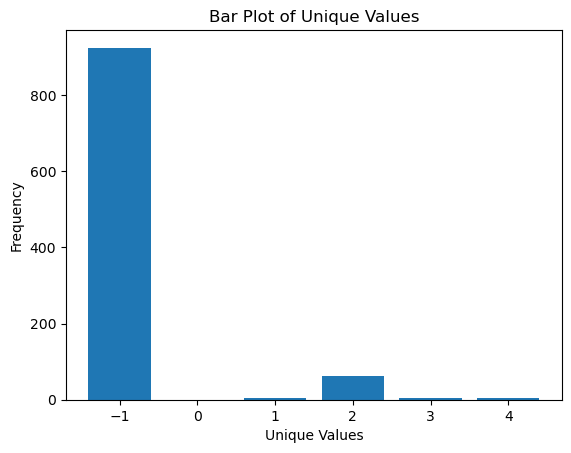

In [16]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

In [17]:
epsilon = 1.5
min_samples = 7
distance_matrix = calculate_distance_matrix(datafinal2)  

cluster_labels = dbscan(distance_matrix, epsilon, min_samples)

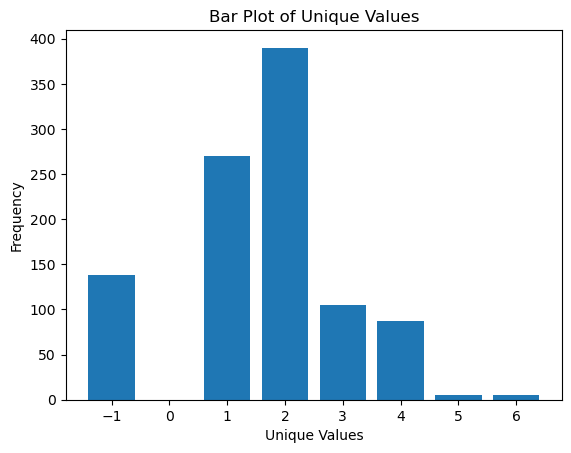

In [18]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

In [33]:
epsilon = 2.5
min_samples = 5
distance_matrix = calculate_distance_matrix(datafinal2)  

cluster_labels = dbscan(distance_matrix, epsilon, min_samples)


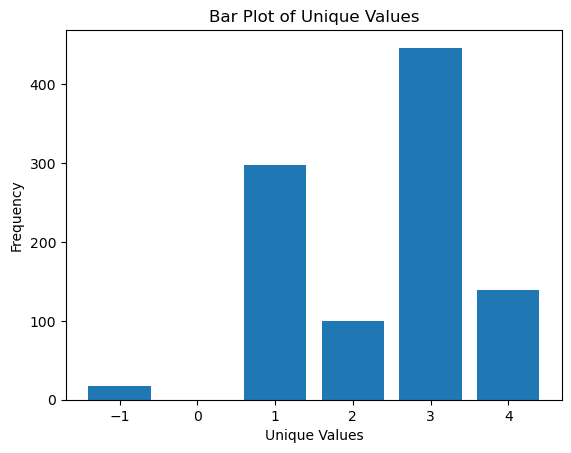

In [34]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

In [35]:
def calculate_silhouette_score(data, cluster_labels):
    distance_matrix = calculate_distance_matrix(data)

    silhouette_values = []

    for i, label in enumerate(cluster_labels):
        a = np.mean(distance_matrix[i][cluster_labels == label])

        b_values = []
        for j in np.unique(cluster_labels):
            if j != label:
                b_values.append(np.mean(distance_matrix[i][cluster_labels == j]))

        b = min(b_values) if b_values else float('inf')

        silhouette = (b - a) / max(a, b)
        silhouette_values.append(silhouette)

    silhouette_avg = np.mean(silhouette_values)

    return silhouette_avg


print("Silhouette Score:", calculate_silhouette_score(datafinal2, cluster_labels))

Silhouette Score: 0.3349492759821617


In [36]:
import numpy as np
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(datafinal2, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3316926503406097
